# Exercício 1



A base Reviews.csv possui avaliações de produtos comprados numa grande empresa de e-commerce no Brasil. Além de informações categóricas, a base possui o campo ```review_text```, com o texto da avaliação, e o campo ```overall_rating```, com a nota dada pelo usuário para determinado produto. Crie um modelo para prever a nota da avaliação do cliente a partir do texto.

Etapas sugeridas:

1 - Faça a divisão da base de teste com pelo menos 20% das amostras (sugestão: out-of-time);

2 - Verifique a existência de dados duplicados ou faltantes;

3 - Crie uma nuvem de palavras para cada nota de avaliação; Verifique a variação das notas ao longo do tempo; 

4 - Crie uma representação para a sua coluna de texto. Você pode tentar Bag Of Words, TF-IDF ou o Word2Vec;

5 - Faça o treinamento do modelo. Você pode utilizar uma busca de hiperparâmetros para otimizar seus resultados;

6 - Aplique seu modelo na base de teste para obter seu resultado.

Desafios:

1 - Faça um modelo considerando as demais variáveis no processo;

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Reviews.csv')

print(df.shape)

df.head()

(132373, 14)


/opt/anaconda3/envs/DSdegree/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# out-of-sample

#df_experimento, df_teste = train_test_split(df, test_size=.3)

#print(df_experimento.shape, df_teste.shape)

In [5]:
df['submission_date'] = pd.to_datetime(df['submission_date'])

In [6]:
# out-of-time

df_experimento = df[df['submission_date'] < pd.to_datetime('2018-05-01')]

df_teste = df[df['submission_date'] >= pd.to_datetime('2018-05-01')]

print(f'{len(df_teste)/len(df):.2f}')

print(df_experimento.shape, df_teste.shape)

0.20
(105939, 14) (26434, 14)


In [7]:
df_experimento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105939 entries, 0 to 105938
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   submission_date        105939 non-null  datetime64[ns]
 1   reviewer_id            105939 non-null  object        
 2   product_id             105939 non-null  object        
 3   product_name           105891 non-null  object        
 4   product_brand          34603 non-null   object        
 5   site_category_lv1      105934 non-null  object        
 6   site_category_lv2      102919 non-null  object        
 7   review_title           105713 non-null  object        
 8   overall_rating         105939 non-null  int64         
 9   recommend_to_a_friend  105921 non-null  object        
 10  review_text            103373 non-null  object        
 11  reviewer_birth_year    101340 non-null  float64       
 12  reviewer_gender        102836 non-null  obje

## 2 - Análise da consistência dos dados

In [8]:
df['overall_rating'].value_counts(dropna=False)

5    47955
4    32345
1    27369
3    16315
2     8389
Name: overall_rating, dtype: int64

### Dados faltantes

In [9]:
df_experimento.isnull().sum()

submission_date              0
reviewer_id                  0
product_id                   0
product_name                48
product_brand            71336
site_category_lv1            5
site_category_lv2         3020
review_title               226
overall_rating               0
recommend_to_a_friend       18
review_text               2566
reviewer_birth_year       4599
reviewer_gender           3103
reviewer_state            2988
dtype: int64

In [10]:
df_experimento = df_experimento.dropna()

### Dados Duplicados

In [11]:
df_experimento.duplicated().value_counts()

False    32703
True        20
dtype: int64

In [12]:
df_experimento[['overall_rating', 'review_text']].duplicated().value_counts()

False    32606
True       117
dtype: int64

In [13]:
df_experimento = df_experimento[['overall_rating', 'review_text']].drop_duplicates()

In [14]:
# df_experimento['review_text'] = df_experimento['review_text'].fillna('Em branco')

In [15]:
df_experimento['review_text'].map(str).count()

32606

In [16]:
df_float = df_experimento['review_text'].map(type) == float

df_float.value_counts()

False    32606
Name: review_text, dtype: int64

In [17]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(texts):
    plt.figure(figsize=(10, 10))
    text = ' '.join(texts.tolist())
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
    words = WC.generate(text)
    plt.imshow(words, interpolation='bilinear')
    plt.show()

In [18]:
# Verificando o balanceamento da coluna 'review_text'

print('Texto mais longo:', df_experimento['review_text'].max())
print('Texto mais curto:', df_experimento['review_text'].min())

Texto mais longo: único problema e qualidade do material não e muito boa mas pelo preço que ele vendido está de acordo com qualidade do material. ponto positivo e muito silencioso tanto na velocidade baixa e alta.
Texto mais curto: !!!!!!!!!!!!!!!!Primeira Bicicleta !!!!!!!!!!!!!!!!!!!!!!!!


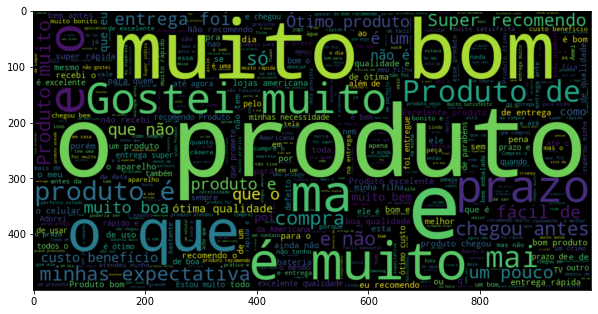

In [19]:
plot_wordcloud(df_experimento['review_text'])

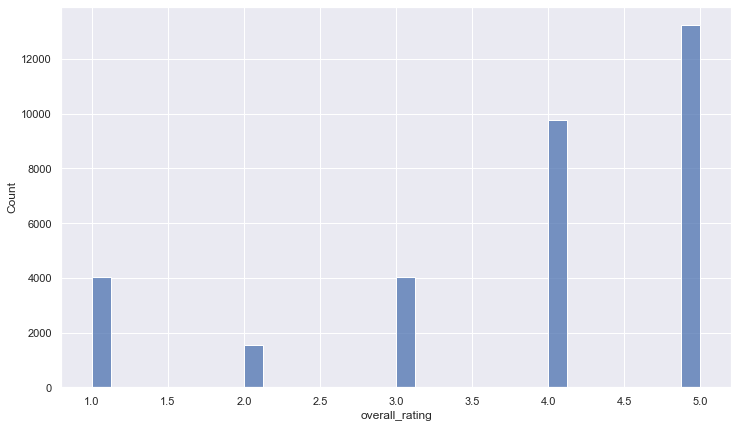

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(12, 7))

sns.histplot(df_experimento['overall_rating'])

plt.show()

In [21]:
df_train, df_valid = train_test_split(df_experimento, test_size=.2)

x_train, y_train = df_train['review_text'], df_train['overall_rating']
x_valid, y_valid = df_valid['review_text'], df_valid['overall_rating']

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(26084,) (26084,)
(6522,) (6522,)


In [22]:
from gensim.utils import simple_preprocess

# Vamos chamar essa função sempre que quisermos quebrar um texto em palavras
def tokenize(text):
    return simple_preprocess(text, min_len=1)

In [23]:
x_train.head()

24077    Bom produto era realmente o que estava precisa...
75336    Muito bom. Recomendo. Chegou antes do prazo. E...
94842    Produto não presta, é uma porcaria, fica vazan...
78595    Não usei ainda pois recebi o mesmo amassado. E...
6325     Muito bom. Se adaptou muito bem a criança. Alé...
Name: review_text, dtype: object

In [24]:
x_train = x_train.str.lower()
x_valid = x_valid.str.lower()

In [25]:
x_train.head()

24077    bom produto era realmente o que estava precisa...
75336    muito bom. recomendo. chegou antes do prazo. e...
94842    produto não presta, é uma porcaria, fica vazan...
78595    não usei ainda pois recebi o mesmo amassado. e...
6325     muito bom. se adaptou muito bem a criança. alé...
Name: review_text, dtype: object

In [26]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
        sentences=x_train.apply(
            lambda t: tokenize(t)
        ),
         vector_size=50,
         window=5,
         min_count=1,
         workers=4
    )

In [27]:
model_w2v.wv.key_to_index

{'e': 0,
 'o': 1,
 'a': 2,
 'de': 3,
 'produto': 4,
 'muito': 5,
 'que': 6,
 'não': 7,
 'é': 8,
 'do': 9,
 'com': 10,
 'para': 11,
 'um': 12,
 'bom': 13,
 'recomendo': 14,
 'entrega': 15,
 'da': 16,
 'em': 17,
 'bem': 18,
 'no': 19,
 'mas': 20,
 'excelente': 21,
 'mais': 22,
 'prazo': 23,
 'na': 24,
 'uma': 25,
 'qualidade': 26,
 'as': 27,
 'chegou': 28,
 'antes': 29,
 'ótimo': 30,
 'foi': 31,
 'eu': 32,
 'super': 33,
 'gostei': 34,
 'americanas': 35,
 'tem': 36,
 'se': 37,
 'boa': 38,
 'minha': 39,
 'comprei': 40,
 'como': 41,
 'já': 42,
 'por': 43,
 'sem': 44,
 'meu': 45,
 'rápida': 46,
 'pra': 47,
 'os': 48,
 'estou': 49,
 'aparelho': 50,
 'só': 51,
 'ele': 52,
 'me': 53,
 'compra': 54,
 'minhas': 55,
 'dia': 56,
 'fácil': 57,
 'expectativas': 58,
 'ótima': 59,
 'até': 60,
 'ser': 61,
 'rápido': 62,
 'celular': 63,
 'mesmo': 64,
 'pois': 65,
 'veio': 66,
 'preço': 67,
 'tudo': 68,
 'custo': 69,
 'ainda': 70,
 'comprar': 71,
 'pouco': 72,
 'uso': 73,
 'recebi': 74,
 'ao': 75,
 'esse'

In [28]:
len(model_w2v.wv.key_to_index)

18578

In [29]:
model_w2v.wv.most_similar('bom', topn=5)

[('otimo', 0.804167628288269),
 ('ótimo', 0.7991566061973572),
 ('bonito', 0.7873276472091675),
 ('útil', 0.7594701051712036),
 ('satisfatório', 0.7520542144775391)]

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_words(words, model_w2v):
    vocab = [word for word in model_w2v.wv.key_to_index]

    X = model_w2v.wv.vectors

    pca = PCA(n_components=2)
    X_reduct = pca.fit_transform(X)

    df = pd.DataFrame(X_reduct, index=vocab, columns=['x', 'y'])

    if type(words) == int:
        df = df.sample(min(words, len(df)))
    else:
        df = df.loc[words]

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        ax.annotate(word, pos)

    plt.show()

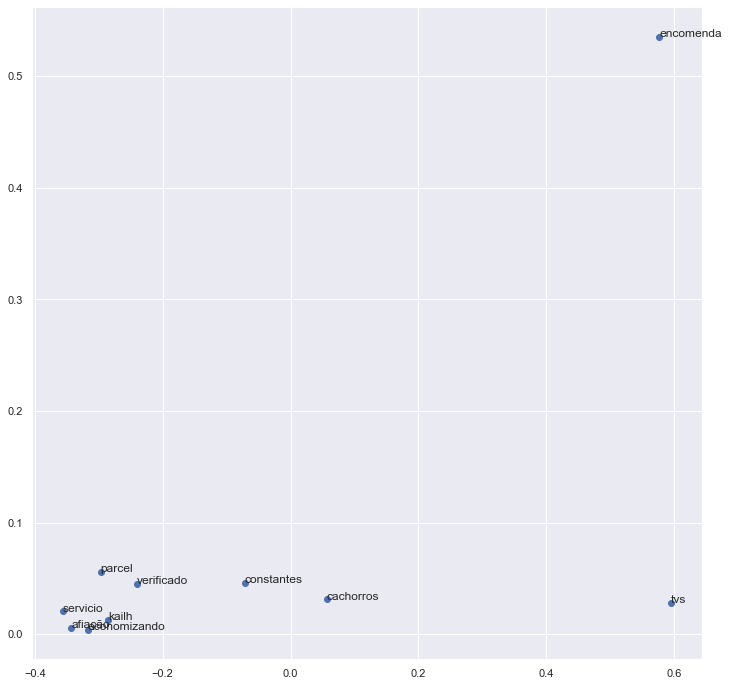

In [31]:
plot_words(10, model_w2v)

In [32]:
from tqdm import tqdm
import numpy as np

def to_word_vector(words, w2v):

    vectors = []

    for word in words:
        vectors.append(w2v.wv[word] if word in w2v.wv.key_to_index else np.zeros(w2v.vector_size))

    return np.mean(vectors, axis=0)

    if not vectors:
        vectors.append(np.zeros(w2v.vector_size))

def embeddings(x, w2v):
    x = x.copy()

    x = x.apply(tokenize)

    x = np.vstack([[to_word_vector(sentences, w2v)] for sentences in tqdm(x)])

    return x

In [33]:
from tqdm import tqdm 
import time

def foo_():
    time.sleep(0.3)
range_ = range(0, 10)
total = len(range_)

with tqdm(total=total, position=0, leave=True) as pbar:
    for i in tqdm((foo_, range_ ), position=0, leave=True):
        pbar.update()

 20%|██        | 2/10 [00:00<00:00, 123.34it/s]


In [34]:
print('x_train:', x_train.shape)
print('x_valid:', x_valid.shape)

x_train: (26084,)
x_valid: (6522,)


In [35]:
x_train_transformed = embeddings(x_train, model_w2v)

x_valid_transformed = embeddings(x_valid, model_w2v);

  0%|          | 0/26084 [00:00<?, ?it/s]/opt/anaconda3/envs/DSdegree/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/DSdegree/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 26084/26084 [00:02<00:00, 10156.66it/s]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 50 and the array at index 290 has size 1

## Stem

In [ ]:
# Natural Language Tool Kit

# Instalação
# import nltk

# nltk.download('rslp')

In [ ]:
from nltk.stem import RSLPStemmer

In [ ]:
st = RSLPStemmer()

In [ ]:
st.stem('bonito')

## 2. Análise da consistência dos dados

## Dados faltantes

In [ ]:
import missingno as msno

In [ ]:
msno.bar(df_experimento)